In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from collections import defaultdict
import copy

In [99]:
compact=pd.read_csv('./Compact.csv')
skewed=pd.read_csv('./Skewed.csv')
subClusters=pd.read_csv('./Subclusters.csv')
wellSeperated=pd.read_csv('./WellSeperated.csv')

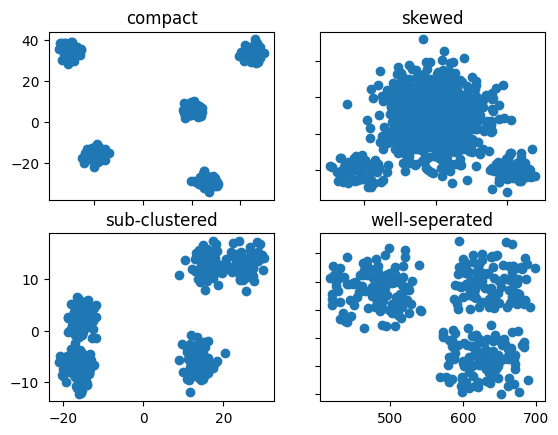

In [100]:
fig, plot = plt.subplots(2, 2)
plot[0, 0].scatter(compact['x1'], compact['x2'])
plot[0, 0].set_title('compact')
plot[0, 1].scatter(skewed['x1'], skewed['x2'])
plot[0, 1].set_title('skewed')
plot[1, 0].scatter(subClusters['x1'], subClusters['x2'])
plot[1, 0].set_title('sub-clustered')
plot[1, 1].scatter(wellSeperated['0'],wellSeperated['1'])
plot[1, 1].set_title('well-seperated')

for ax in plot.flat:
    ax.label_outer()

C:\Users\Adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.911779955803382
7.909234518883363


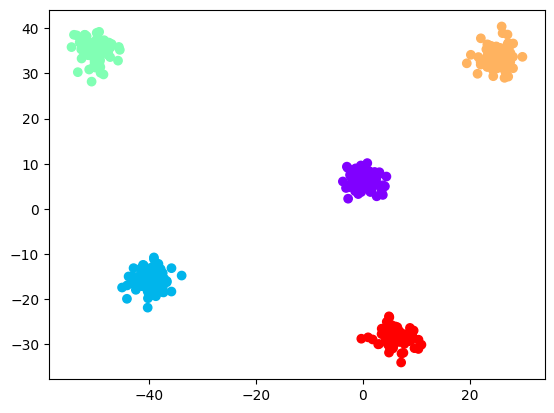

In [101]:
Kmeans_compact=KMeans(n_clusters=5, random_state=0).fit(compact)
plt.scatter(compact['x1'], compact['x2'], c=Kmeans_compact.labels_, cmap='rainbow')
km_compact_score=silhouette_score(compact, Kmeans_compact.labels_)
print(km_compact_score)

distortion_km_compact=0.0
for i in range(Kmeans_compact.n_clusters):
    distortion_km_compact+=np.sum((compact[Kmeans_compact.labels_==i]-Kmeans_compact.cluster_centers_[i])**2)
distortion_km_compact=(distortion_km_compact['x1']+distortion_km_compact['x2'])/compact.shape[0]
print(distortion_km_compact)

0.4307662542666085

C:\Users\Adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



33.531223256799954


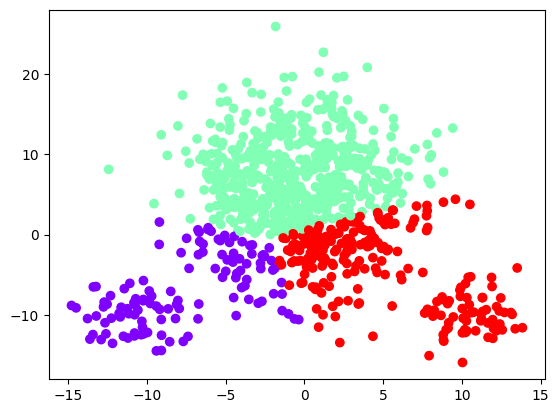

In [102]:
Kmeans_skewed=KMeans(n_clusters=3, random_state=0).fit(skewed)
plt.scatter(skewed['x1'], skewed['x2'], c=Kmeans_skewed.labels_, cmap='rainbow')
km_skewed_score=silhouette_score(skewed, Kmeans_skewed.labels_)
print(km_skewed_score)
distortion_km_skewed=0.0
for i in range(Kmeans_skewed.n_clusters):
    distortion_km_skewed+=np.sum((skewed[Kmeans_skewed.labels_==i]-Kmeans_skewed.cluster_centers_[i])**2)
distortion_km_skewed=(distortion_km_skewed['x1']+distortion_km_skewed['x2'])/skewed.shape[0]
print(distortion_km_skewed)

0.738949032645643
26.988490468095733


C:\Users\Adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


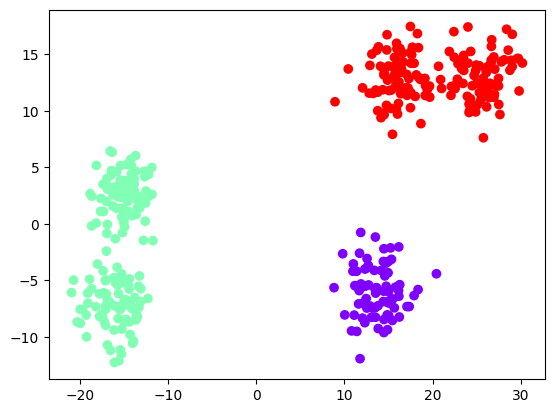

In [103]:
Kmeans_subClusters=KMeans(n_clusters=3,random_state=0).fit(subClusters)
plt.scatter(subClusters['x1'], subClusters['x2'], c=Kmeans_subClusters.labels_, cmap='rainbow')
km_subClusters_score=silhouette_score(subClusters, Kmeans_subClusters.labels_)
print(km_subClusters_score)
distortion_km_subClusters=0.0
for i in range(Kmeans_subClusters.n_clusters):
    distortion_km_subClusters+=np.sum((subClusters[Kmeans_subClusters.labels_==i]-Kmeans_subClusters.cluster_centers_[i])**2)
distortion_km_subClusters=(distortion_km_subClusters['x1']+distortion_km_subClusters['x2'])/subClusters.shape[0]
print(distortion_km_subClusters)

0.6139686838600172
1880.377952374768


C:\Users\Adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


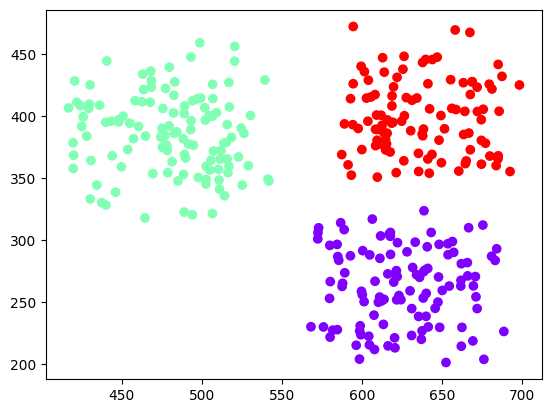

In [104]:
Kmeans_wellSeperated=KMeans(n_clusters=3, random_state=0).fit(wellSeperated)
plt.scatter(wellSeperated['0'], wellSeperated['1'], c=Kmeans_wellSeperated.labels_, cmap='rainbow')
km_wellSeperated_score=silhouette_score(wellSeperated, Kmeans_wellSeperated.labels_)
print(km_wellSeperated_score)
distortion_km_wellSeperated=0.0
for i in range(Kmeans_wellSeperated.n_clusters):
    distortion_km_wellSeperated+=np.sum((wellSeperated[Kmeans_wellSeperated.labels_==i]-Kmeans_wellSeperated.cluster_centers_[i])**2)
distortion_km_wellSeperated=(distortion_km_wellSeperated['0']+distortion_km_wellSeperated['1'])/wellSeperated.shape[0]
print(distortion_km_wellSeperated)

0.9118707716500531
0
7.909234518883361


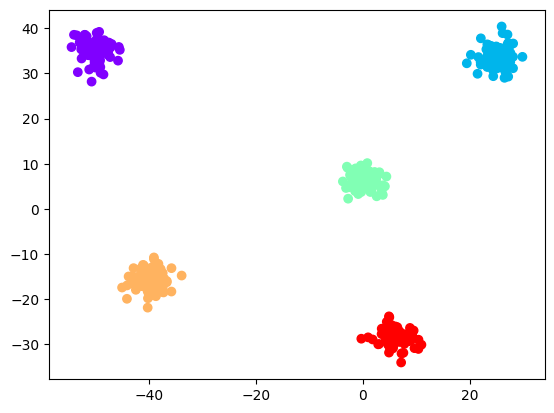

In [105]:
DBSCAN_compact=DBSCAN(eps=3, min_samples=3).fit(compact)
compact_dbscan=copy.deepcopy(compact)
compact_dbscan["labels"]=DBSCAN_compact.labels_
compact_dbscan=compact_dbscan[compact_dbscan["labels"]>-1]

plt.scatter(compact_dbscan['x1'], compact_dbscan['x2'], c=compact_dbscan["labels"], cmap='rainbow')
dbscan_compact_score=silhouette_score(compact_dbscan,compact_dbscan["labels"] )
print(dbscan_compact_score)
noise_points_compact=len(compact_dbscan[compact_dbscan["labels"]==-1])
print(noise_points_compact)

distortion_dbscan_compact=0.0
for i in compact_dbscan["labels"].unique():
    all[i]=compact_dbscan[compact_dbscan["labels"]==i]
    distortion_dbscan_compact+=np.sum((compact_dbscan[compact_dbscan["labels"]==i]-compact_dbscan[compact_dbscan["labels"]==i].mean())**2)
distortion_dbscan_compact=(distortion_dbscan_compact['x1'] + distortion_dbscan_compact['x2'])/compact_dbscan.shape[0]
print(distortion_dbscan_compact)


noise points=  15
0.5016121929493117
42.33590848022978


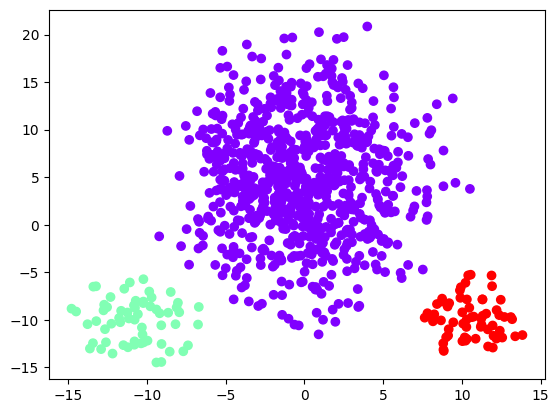

In [106]:
DBSCAN_skewed=DBSCAN(eps=2, min_samples=3).fit(skewed)
skewed_dbscan=copy.deepcopy(skewed)
skewed_dbscan["labels"]=DBSCAN_skewed.labels_
noise_points_skewed=len(skewed_dbscan[skewed_dbscan["labels"]==-1])
print("noise points= ",noise_points_skewed)
skewed_dbscan=skewed_dbscan[skewed_dbscan["labels"]>-1]

plt.scatter(skewed_dbscan['x1'], skewed_dbscan['x2'], c=skewed_dbscan["labels"], cmap='rainbow')
dbscan_skewed_score=silhouette_score(skewed_dbscan,skewed_dbscan["labels"] )
print(dbscan_skewed_score)

distortion_dbscan_skewed=0.0
for i in skewed_dbscan["labels"].unique():
    distortion_dbscan_skewed+=np.sum((skewed_dbscan[skewed_dbscan["labels"]==i]-skewed_dbscan[skewed_dbscan["labels"]==i].mean())**2)
distortion_dbscan_skewed=(distortion_dbscan_skewed['x1'] + distortion_dbscan_skewed['x2'])/skewed_dbscan.shape[0]
print(distortion_dbscan_skewed)

noise points=  0
0.7393671247638355
26.988490468095733


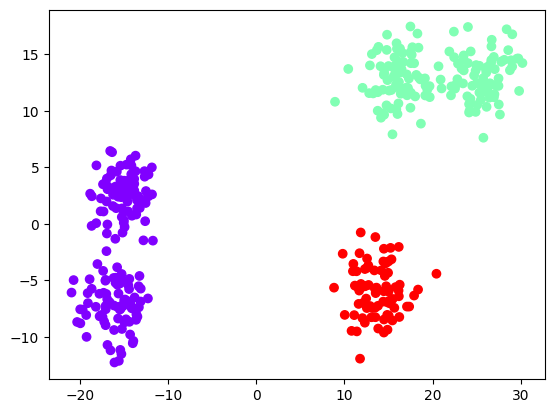

In [107]:
DBSCAN_subClusters=DBSCAN(eps=5, min_samples=10).fit(subClusters)
subClusters_dbscan=copy.deepcopy(subClusters)
subClusters_dbscan["labels"]=DBSCAN_subClusters.labels_
noise_points_subClusters=len(subClusters_dbscan[subClusters_dbscan["labels"]==-1])
print("noise points= ",noise_points_subClusters)
subClusters_dbscan=subClusters_dbscan[subClusters_dbscan["labels"]>-1]

plt.scatter(subClusters_dbscan['x1'], subClusters_dbscan['x2'], c=subClusters_dbscan["labels"], cmap='rainbow')
dbscan_subClusters_score=silhouette_score(subClusters_dbscan,subClusters_dbscan["labels"] )
print(dbscan_subClusters_score)

distortion_dbscan_subClusters=0.0
for i in subClusters_dbscan["labels"].unique():
    distortion_dbscan_subClusters+=np.sum((subClusters_dbscan[subClusters_dbscan["labels"]==i]-subClusters_dbscan[subClusters_dbscan["labels"]==i].mean())**2)
distortion_dbscan_subClusters=(distortion_dbscan_subClusters['x1'] + distortion_dbscan_subClusters['x2'])/subClusters_dbscan.shape[0]
print(distortion_dbscan_subClusters)


noise points=  4
0.6175308455962844
1828.467719407888


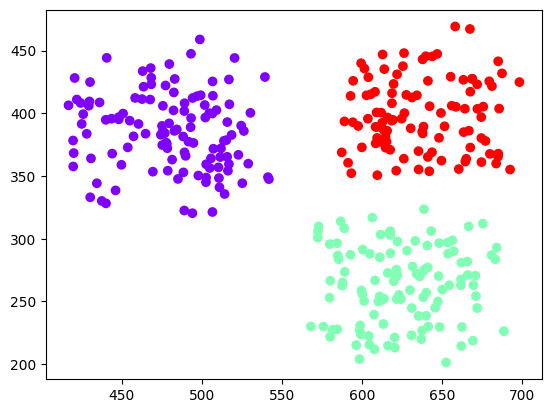

In [108]:
DBSCAN_wellSeperated=DBSCAN(eps=29, min_samples=10).fit(wellSeperated)

wellSeperated_dbscan=copy.deepcopy(wellSeperated)
wellSeperated_dbscan["labels"]=DBSCAN_wellSeperated.labels_
noise_points_wellSeperated=len(wellSeperated_dbscan[wellSeperated_dbscan["labels"]==-1])
print("noise points= ",noise_points_wellSeperated)
wellSeperated_dbscan=wellSeperated_dbscan[wellSeperated_dbscan["labels"]>-1]

plt.scatter(wellSeperated_dbscan['0'], wellSeperated_dbscan['1'], c=wellSeperated_dbscan["labels"], cmap='rainbow')
dbscan_wellSeperated_score=silhouette_score(wellSeperated_dbscan,wellSeperated_dbscan["labels"] )
print(dbscan_wellSeperated_score)

distortion_dbscan_wellSeperated=0.0
for i in wellSeperated_dbscan["labels"].unique():
    distortion_dbscan_wellSeperated+=np.sum((wellSeperated_dbscan[wellSeperated_dbscan["labels"]==i]-wellSeperated_dbscan[wellSeperated_dbscan["labels"]==i].mean())**2)
distortion_dbscan_wellSeperated=(distortion_dbscan_wellSeperated['0'] + distortion_dbscan_wellSeperated['1'])/wellSeperated_dbscan.shape[0]
print(distortion_dbscan_wellSeperated)

0.911779955803382
7.9092345188833635


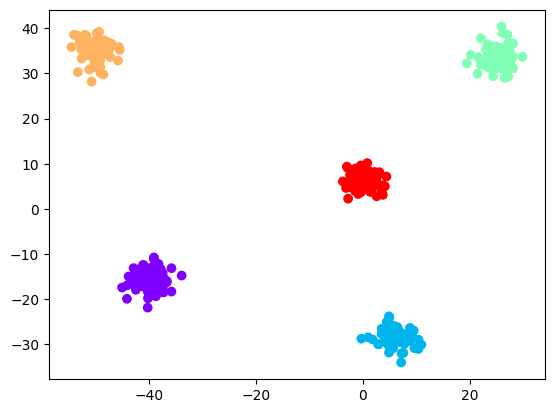

In [109]:
agg_compact=AgglomerativeClustering(n_clusters=5,linkage='average').fit(compact)
plt.scatter(compact['x1'], compact['x2'], c=agg_compact.labels_, cmap='rainbow')
agg_compact_score=silhouette_score(compact, agg_compact.labels_)
print(agg_compact_score)

distortion_agg_compact=0.0
for i in range(agg_compact.n_clusters):
    distortion_agg_compact+=np.sum((compact[agg_compact.labels_==i]-compact[agg_compact.labels_==i].mean())**2)
distortion_agg_compact=(distortion_agg_compact['x1']+distortion_agg_compact['x2'])/compact.shape[0]
print(distortion_agg_compact)

0.39141188033602886
25.027148068930753


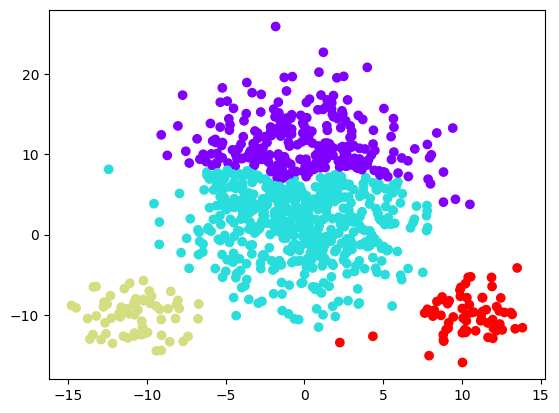

In [110]:
agg_skewed=AgglomerativeClustering(n_clusters=4,linkage='average').fit(skewed)
plt.scatter(skewed['x1'], skewed['x2'], c=agg_skewed.labels_, cmap='rainbow')
agg_skewed_score=silhouette_score(skewed, agg_skewed.labels_)
print(agg_skewed_score)

distortion_agg_skewed=0.0
for i in range(agg_skewed.n_clusters):
    distortion_agg_skewed+=np.sum((skewed[agg_skewed.labels_==i]-skewed[agg_skewed.labels_==i].mean())**2)
distortion_agg_skewed=(distortion_agg_skewed['x1']+distortion_agg_skewed['x2'])/skewed.shape[0]
print(distortion_agg_skewed)


0.738949032645643
26.988490468095733


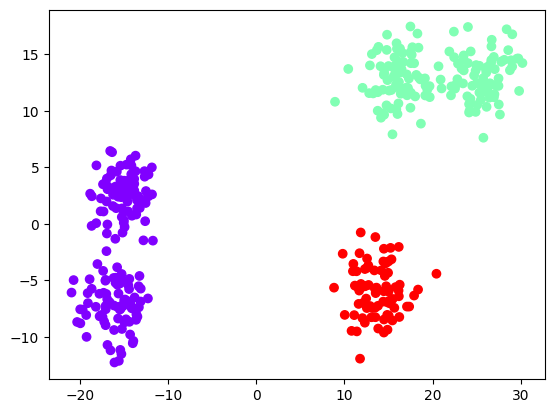

In [111]:
agg_subClusters=AgglomerativeClustering(n_clusters=3,linkage='average').fit(subClusters)
plt.scatter(subClusters['x1'], subClusters['x2'], c=agg_subClusters.labels_, cmap='rainbow')
agg_subClusters_score=silhouette_score(subClusters, agg_subClusters.labels_)
print(agg_subClusters_score)

distortion_agg_subClusters=0.0
for i in range(agg_subClusters.n_clusters):
    distortion_agg_subClusters+=np.sum((subClusters[agg_subClusters.labels_==i]-subClusters[agg_subClusters.labels_==i].mean())**2)
distortion_agg_subClusters=(distortion_agg_subClusters['x1']+distortion_agg_subClusters['x2'])/subClusters.shape[0]
print(distortion_agg_subClusters)

0.6139686838600172
1880.377952374768


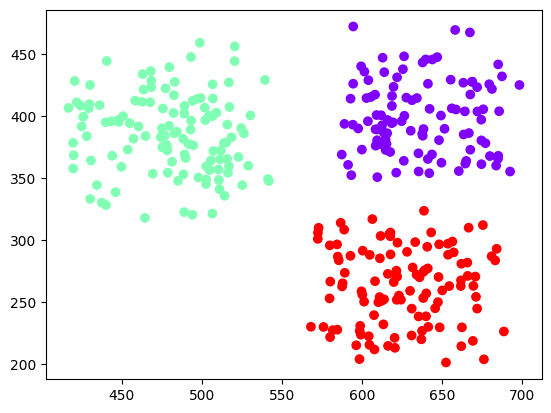

In [112]:
agg_wellSeperated=AgglomerativeClustering(n_clusters=3, linkage='average').fit(wellSeperated)
plt.scatter(wellSeperated['0'], wellSeperated['1'], c=agg_wellSeperated.labels_, cmap='rainbow')
agg_wellSeperated_score=silhouette_score(wellSeperated, agg_wellSeperated.labels_)
print(agg_wellSeperated_score)

distortion_agg_wellSeperated=0.0
for i in range(agg_wellSeperated.n_clusters):
    distortion_agg_wellSeperated+=np.sum((wellSeperated[agg_wellSeperated.labels_==i]-wellSeperated[agg_wellSeperated.labels_==i].mean())**2)

distortion_agg_wellSeperated=(distortion_agg_wellSeperated['0']+distortion_agg_wellSeperated['1'])/wellSeperated.shape[0]
print(distortion_agg_wellSeperated)


In [113]:
compact_scores=[km_compact_score, dbscan_compact_score, agg_compact_score, noise_points_compact]
skewed_scores=[km_skewed_score, dbscan_skewed_score, agg_skewed_score, noise_points_skewed]
subClusters_scores=[km_subClusters_score, dbscan_subClusters_score, agg_subClusters_score, noise_points_subClusters]
wellSeperated_scores=[km_wellSeperated_score, dbscan_wellSeperated_score, agg_wellSeperated_score, noise_points_wellSeperated]

In [114]:
from tabulate import tabulate

data = {
    "Algorithm": ["K-Means", "DBSCAN", "Agglomerative Clustering","Noise points in DBSCAN"],
    "Compact Dataset": compact_scores,
    "Skewed Dataset": skewed_scores,
    "SubClusters Dataset": subClusters_scores,
    "Well-Seperated Dataset": wellSeperated_scores
}

df = pd.DataFrame(data)

print(tabulate(df, headers="keys", tablefmt="pretty", showindex=False))


+--------------------------+--------------------+---------------------+---------------------+------------------------+
|        Algorithm         |  Compact Dataset   |   Skewed Dataset    | SubClusters Dataset | Well-Seperated Dataset |
+--------------------------+--------------------+---------------------+---------------------+------------------------+
|         K-Means          | 0.911779955803382  | 0.4307662542666085  |  0.738949032645643  |   0.6139686838600172   |
|          DBSCAN          | 0.9118707716500531 | 0.5016121929493117  | 0.7393671247638355  |   0.6175308455962844   |
| Agglomerative Clustering | 0.911779955803382  | 0.39141188033602886 |  0.738949032645643  |   0.6139686838600172   |
|  Noise points in DBSCAN  |        0.0         |        15.0         |         0.0         |          4.0           |
+--------------------------+--------------------+---------------------+---------------------+------------------------+


##### ***This is the silhouette score and noise points obtained in DBSCAN***

In [115]:
compact_scores=[distortion_km_compact, distortion_dbscan_compact, distortion_agg_compact]
skewed_scores=[distortion_km_skewed, distortion_dbscan_skewed, distortion_agg_skewed]
subClusters_scores=[distortion_km_subClusters, distortion_dbscan_subClusters, distortion_agg_subClusters]
wellSeperated_scores=[distortion_km_wellSeperated, distortion_dbscan_wellSeperated, distortion_agg_wellSeperated]


In [116]:
data = {
    "Algorithm": ["K-Means", "DBSCAN", "Agglomerative Clustering"],
    "Compact Dataset": compact_scores,
    "Skewed Dataset": skewed_scores,
    "SubClusters Dataset": subClusters_scores,
    "Well-Seperated Dataset": wellSeperated_scores
}

df = pd.DataFrame(data)

print(tabulate(df, headers="keys", tablefmt="pretty", showindex=False))

+--------------------------+--------------------+--------------------+---------------------+------------------------+
|        Algorithm         |  Compact Dataset   |   Skewed Dataset   | SubClusters Dataset | Well-Seperated Dataset |
+--------------------------+--------------------+--------------------+---------------------+------------------------+
|         K-Means          | 7.909234518883363  | 33.531223256799954 | 26.988490468095733  |   1880.377952374768    |
|          DBSCAN          | 7.909234518883361  | 42.33590848022978  | 26.988490468095733  |   1828.467719407888    |
| Agglomerative Clustering | 7.9092345188833635 | 25.027148068930753 | 26.988490468095733  |   1880.377952374768    |
+--------------------------+--------------------+--------------------+---------------------+------------------------+


##### ***Above mentioned are mean squared distance between centroid and cluster point for each cluster***

## `Inference`

- For `Compact dataset`, we infer from the data that all of them perform nearly the same with the quality of clusters that they produce. But in theory, **K-Means** algorithm would work the best here because they are linearly seperable.

- For `Skewed dataset`, we infer that **DBSCAN** algorithm works the best here because it can handle non-convex and irregularly shaped clusters, although in this case the distortion was the highest. 

- For `SubClustered dataset`, we infer that all perform nearly the same in terms of clustereing quality. But in practice, **agglomerative clustering** should work the best here because it creates a hierarchical representation of the data, which can reveal both large and small subclusters.

- For `Well-seperated dataset`, we infer that Kmeans and agglomerative methods perform similarly. But in theory, **K-Means** algorithm would work the best here because they are easily seperable and agglomerative clustering can create subcluster in the seperated data. 

---
---

##### **`NOTE`** : 
The parameters for each algorithm were decided by manual tuning and the best parameters were used for the final results.